In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/content/wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# Task 1 EDA

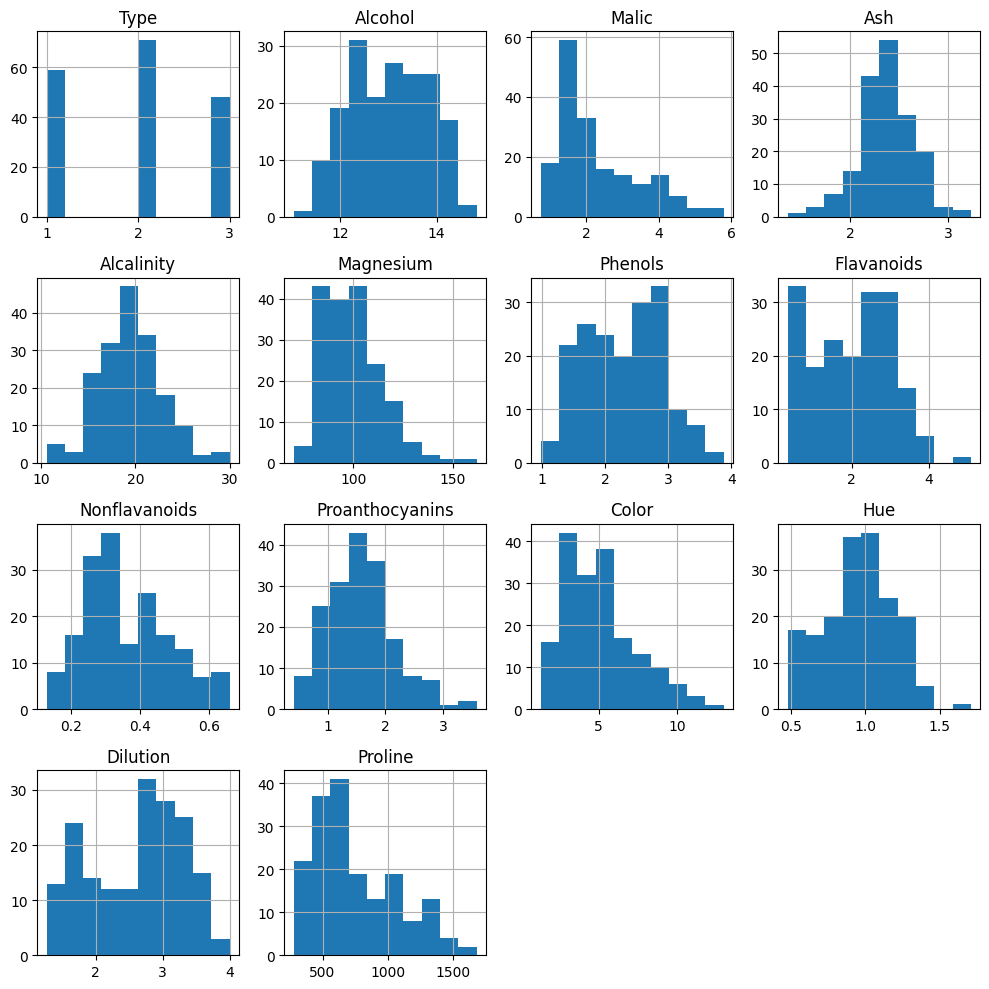

In [3]:
# Histogram for each feature
df.hist(figsize=(10,10))
plt.tight_layout()

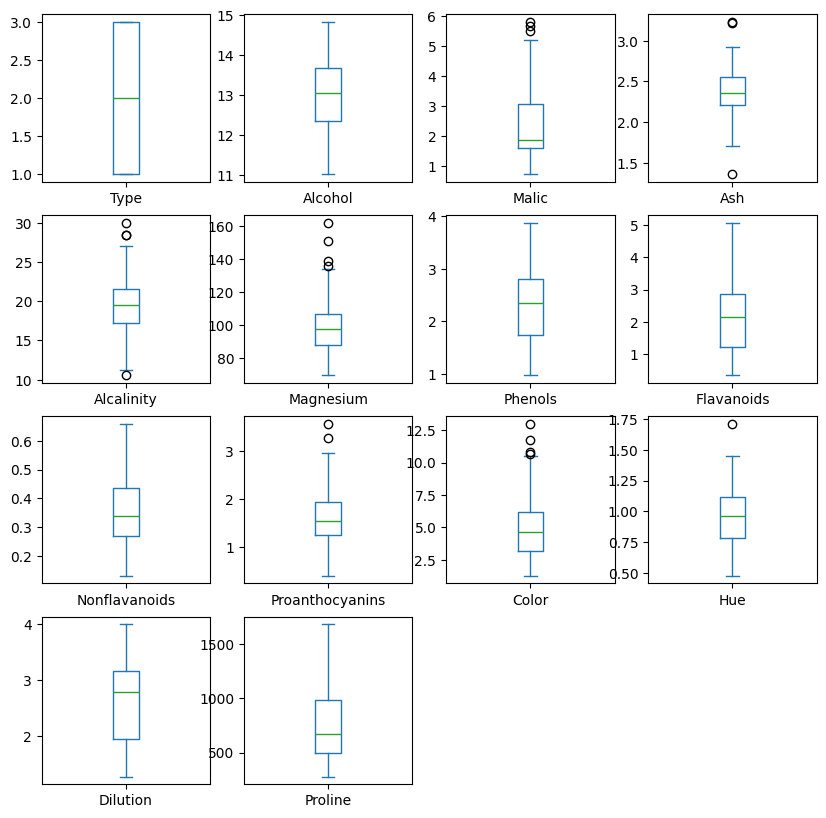

In [4]:
# Box plot for each feature
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(10, 10))
plt.show()

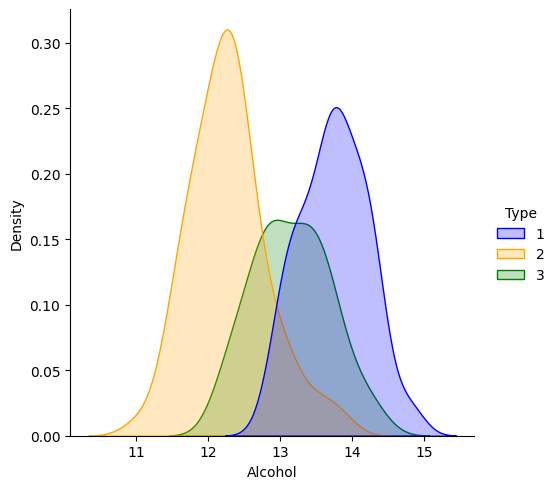

In [5]:
import seaborn as sns
sns.displot(data=df,
            x='Alcohol',
            hue='Type',
            fill=True,
            kind='kde',
            palette=['Blue','Orange','Green'])

In [ ]:
# Task 2

In [6]:
# Standardizing the features
features = df.columns
df_normal = StandardScaler().fit_transform(df[features])

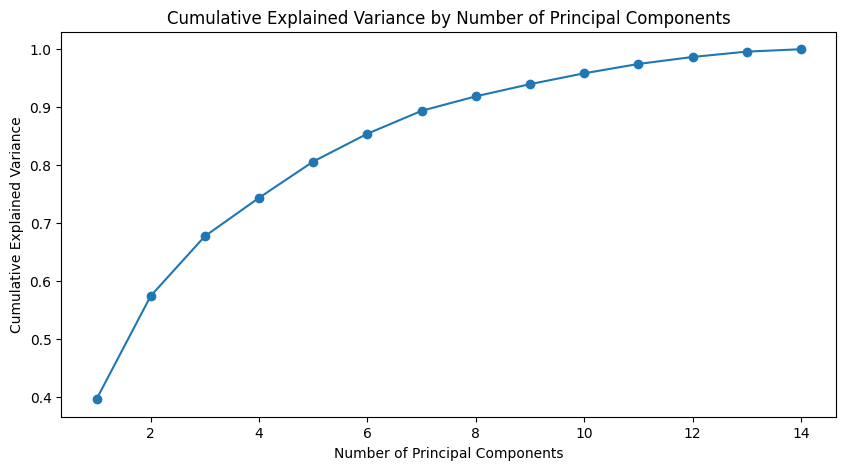

In [7]:
# PCA fitting
pca = PCA()
principal_components = pca.fit_transform(df_normal)

# Explained variance plot (scree plot)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [8]:
df_pca = pd.DataFrame(principal_components)


In [ ]:
# Task 3

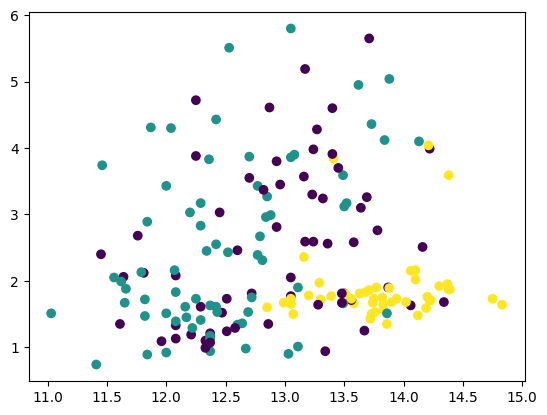

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
labels = kmeans.labels_

# Visualization
plt.scatter(df['Alcohol'], df['Malic'], c=labels)
plt.show()

In [14]:
df_avg = silhouette_score(df, labels)
print(f'Silhouette Score: {df_avg}')


Silhouette Score: 0.5711220218931753


In [ ]:
# Task 4

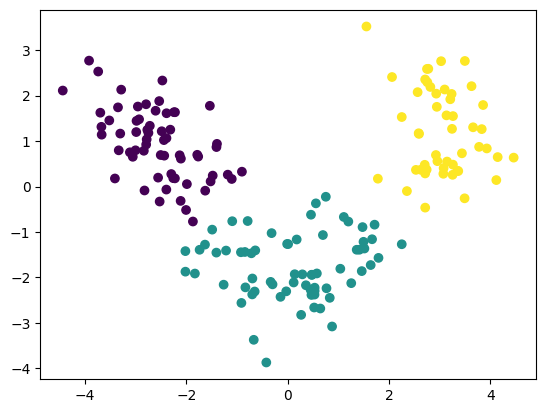

In [15]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(df_pca)
labels_pca = kmeans_pca.labels_

# Visualization
plt.scatter(df_pca[0], df_pca[1], c=labels_pca)
plt.show()

In [16]:
df_avg_pca = silhouette_score(df_pca, labels_pca)
print(f'Silhouette Score after PCA: {df_avg_pca}')

Silhouette Score after PCA: 0.30648398324833453


In [ ]:
# Task 5 and 6

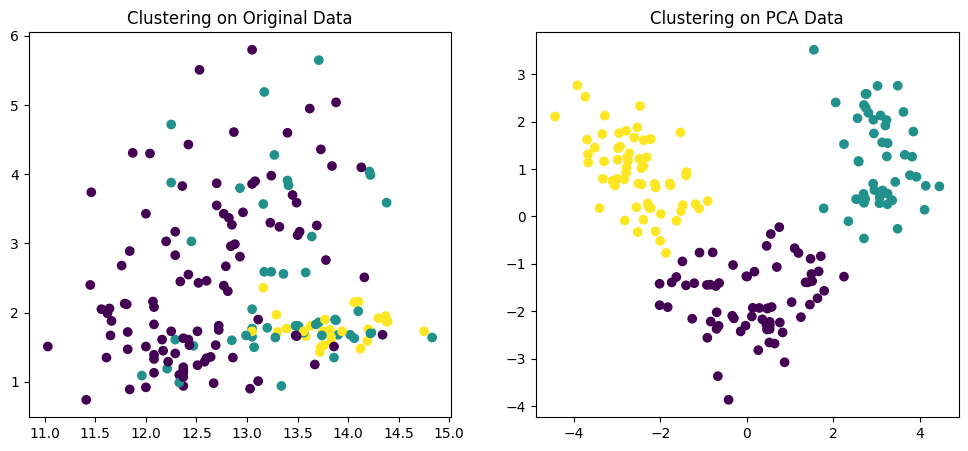

(np.float64(0.5595717835631026), np.float64(0.30648398324833453))

In [17]:
# Applying KMeans to the original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(df)

# Applying KMeans to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(df_pca)

# Calculating silhouette scores
silhouette_original = silhouette_score(df, labels_original)
silhouette_pca = silhouette_score(df_pca, labels_pca)

# Visualizing the clustering results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Alcohol'], df['Malic'], c=labels_original, cmap='viridis')
plt.title('Clustering on Original Data')

plt.subplot(1, 2, 2)
plt.scatter(df_pca[0], df_pca[1], c=labels_pca, cmap='viridis')
plt.title('Clustering on PCA Data')

plt.show()

silhouette_original, silhouette_pca

In [ ]:
# task 5

'''Silhouette Score Comparison:

Original Data: The silhouette score is approximately 0.571.
PCA Data: The silhouette score is approximately 0.308.
The silhouette score for the original data is higher than that for the PCA-transformed data, indicating that the clustering on the original data produced more well-defined clusters.

Visualization Comparison:

The scatter plots show the clustering results for both the original and PCA-transformed data. The clusters in the original data are more distinct compared to those in the PCA-transformed data.
Analysis:

Dimensionality Reduction Impact: PCA reduced the dimensionality, which can simplify the dataset and reduce computational complexity. However, in this case, it also led to a decrease in the quality of clustering as indicated by the lower silhouette score.
Cluster Separation: The original data had more clearly separated clusters, likely due to retaining the original feature relationships that PCA may have diluted'''

In [ ]:
# task 6 conclusion and insights

'''Key Findings:

Clustering on the original dataset produced better-defined clusters as indicated by a higher silhouette score.
PCA, while useful for reducing dimensionality, can sometimes lead to a loss of information that is critical for tasks like clustering.
Practical Implications:

PCA is beneficial when dealing with very high-dimensional data, particularly when computational efficiency is a concern. However, one must carefully assess the trade-offs between dimensionality reduction and the potential loss of important data characteristics.
For datasets where features are highly correlated, PCA can effectively capture the variance with fewer dimensions, but it may not always improve clustering outcomes.
Recommendations:

When to Use PCA: PCA is advisable when you have a large number of features and want to reduce noise or when the dataset's dimensionality is too high for direct clustering.
When to Avoid PCA: If the dataset has well-separated clusters in its original form or if the relationships between features are crucial, it may be better to perform clustering directly without dimensionality reduction.'''